In [17]:
# lib
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# for plot
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn import linear_model

%precision 3

%matplotlib inline

In [3]:

X = pd.read_csv("7-3-1-large-data.csv")
X.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,1.0000,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,...,0.0110,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100
1,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,...,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099
2,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,...,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098
3,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,0.0769,...,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098,0.0097
4,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,0.0769,0.0714,...,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098,0.0097,0.0096


In [4]:

sp.mean(X.X_1)

0.037

In [5]:

sp.mean(X, axis=0).head()

X_1    0.037272
X_2    0.030649
X_3    0.027360
X_4    0.025181
X_5    0.023558
dtype: float64

In [6]:

X -= sp.mean(X, axis=0)
X /= sp.std(X, ddof=1, axis=0)

In [8]:

sp.std(X, ddof=1, axis=0).head()

X_1    1.0
X_2    1.0
X_3    1.0
X_4    1.0
X_5    1.0
dtype: float64

In [10]:

noise = sp.stats.norm.rvs(loc=0, scale=1, size=X.shape[0])
y = X.X_1 * 5 + noise

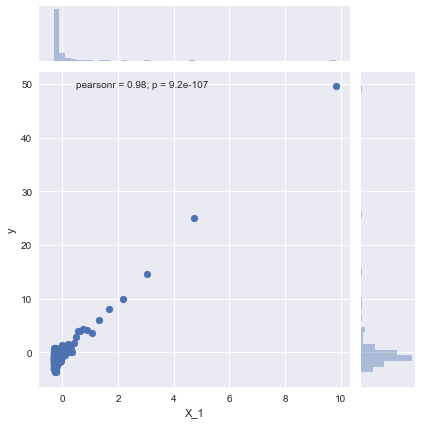

In [12]:

large_data = pd.concat([pd.DataFrame({"y":y}), X], axis=1)

sns.jointplot(y="y", x="X_1", data=large_data)

In [16]:

lm_statsmodels = sm.OLS(endog=y, exog=X).fit()
lm_statsmodels.params.head()

X_1    -5.393035
X_2    47.508841
X_3   -13.622408
X_4   -50.925555
X_5   -45.434049
dtype: float64

In [19]:

lm_sklearn = linear_model.LinearRegression()

lm_sklearn.fit(X, y)

lm_sklearn.coef_

array([-5.393e+00,  4.751e+01, -1.362e+01, -5.093e+01, -4.543e+01,
        3.824e+01, -1.279e+01,  4.876e+01,  6.155e+00,  4.727e+01,
        2.530e+00,  1.072e+00, -1.175e+01,  3.842e+01, -5.462e+01,
       -3.156e+01,  4.801e+00,  2.854e+01, -3.796e+01, -4.181e+01,
        1.690e+00, -3.402e+01,  6.713e+01,  1.602e+01,  1.756e+01,
       -2.069e+01, -2.066e+01, -4.995e+01, -9.151e+00, -2.260e+01,
        4.715e+01,  2.529e+01,  2.542e+01,  2.379e+01,  2.414e+01,
       -5.918e+00, -2.234e+01,  1.210e+01, -4.383e+01,  2.483e+01,
       -3.527e+00,  1.476e+01,  1.117e+01, -3.636e+00, -4.465e-01,
       -8.261e+00,  4.908e-01, -1.780e+01, -9.094e+00, -1.477e+00,
        6.712e+00,  2.911e+01, -2.247e+01,  8.076e+00, -1.596e+01,
       -1.576e+01,  3.221e+00, -3.655e+00,  3.494e+00,  1.546e+01,
        8.916e+00,  1.079e+01, -1.382e+01,  3.124e+00, -2.985e+00,
       -1.355e+00, -3.460e+00, -8.794e+00,  1.462e+00,  1.337e+00,
        2.128e+01, -3.947e+00, -8.340e+00,  5.410e+00,  6.024e

In [20]:

n_alphas = 50
ridge_alphas = np.logspace(-2, 0.7, n_alphas)

In [21]:

sp.log10(ridge_alphas)

array([-2.   , -1.945, -1.89 , -1.835, -1.78 , -1.724, -1.669, -1.614,
       -1.559, -1.504, -1.449, -1.394, -1.339, -1.284, -1.229, -1.173,
       -1.118, -1.063, -1.008, -0.953, -0.898, -0.843, -0.788, -0.733,
       -0.678, -0.622, -0.567, -0.512, -0.457, -0.402, -0.347, -0.292,
       -0.237, -0.182, -0.127, -0.071, -0.016,  0.039,  0.094,  0.149,
        0.204,  0.259,  0.314,  0.369,  0.424,  0.48 ,  0.535,  0.59 ,
        0.645,  0.7  ])

In [22]:

ridge_coefs = []

for a in ridge_alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)
    

In [23]:

ridge_coefs = np.array(ridge_coefs)
ridge_coefs.shape


(50, 100)

Text(0,0.5,'Coefficients')

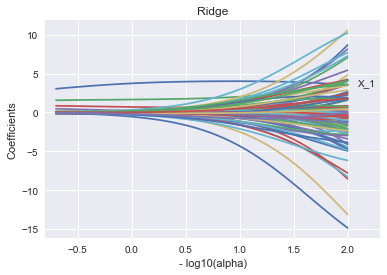

In [29]:

log_alphas = -sp.log10(ridge_alphas)

plt.plot(log_alphas, ridge_coefs)

plt.text(max(log_alphas) + 0.1, np.array(ridge_coefs)[0,0], "X_1")

plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])

plt.title("Ridge")
plt.xlabel("- log10(alpha)")
plt.ylabel("Coefficients")


左に行くほど、αが大きくて正則化の強度が強い
